<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Hunger_games_v5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

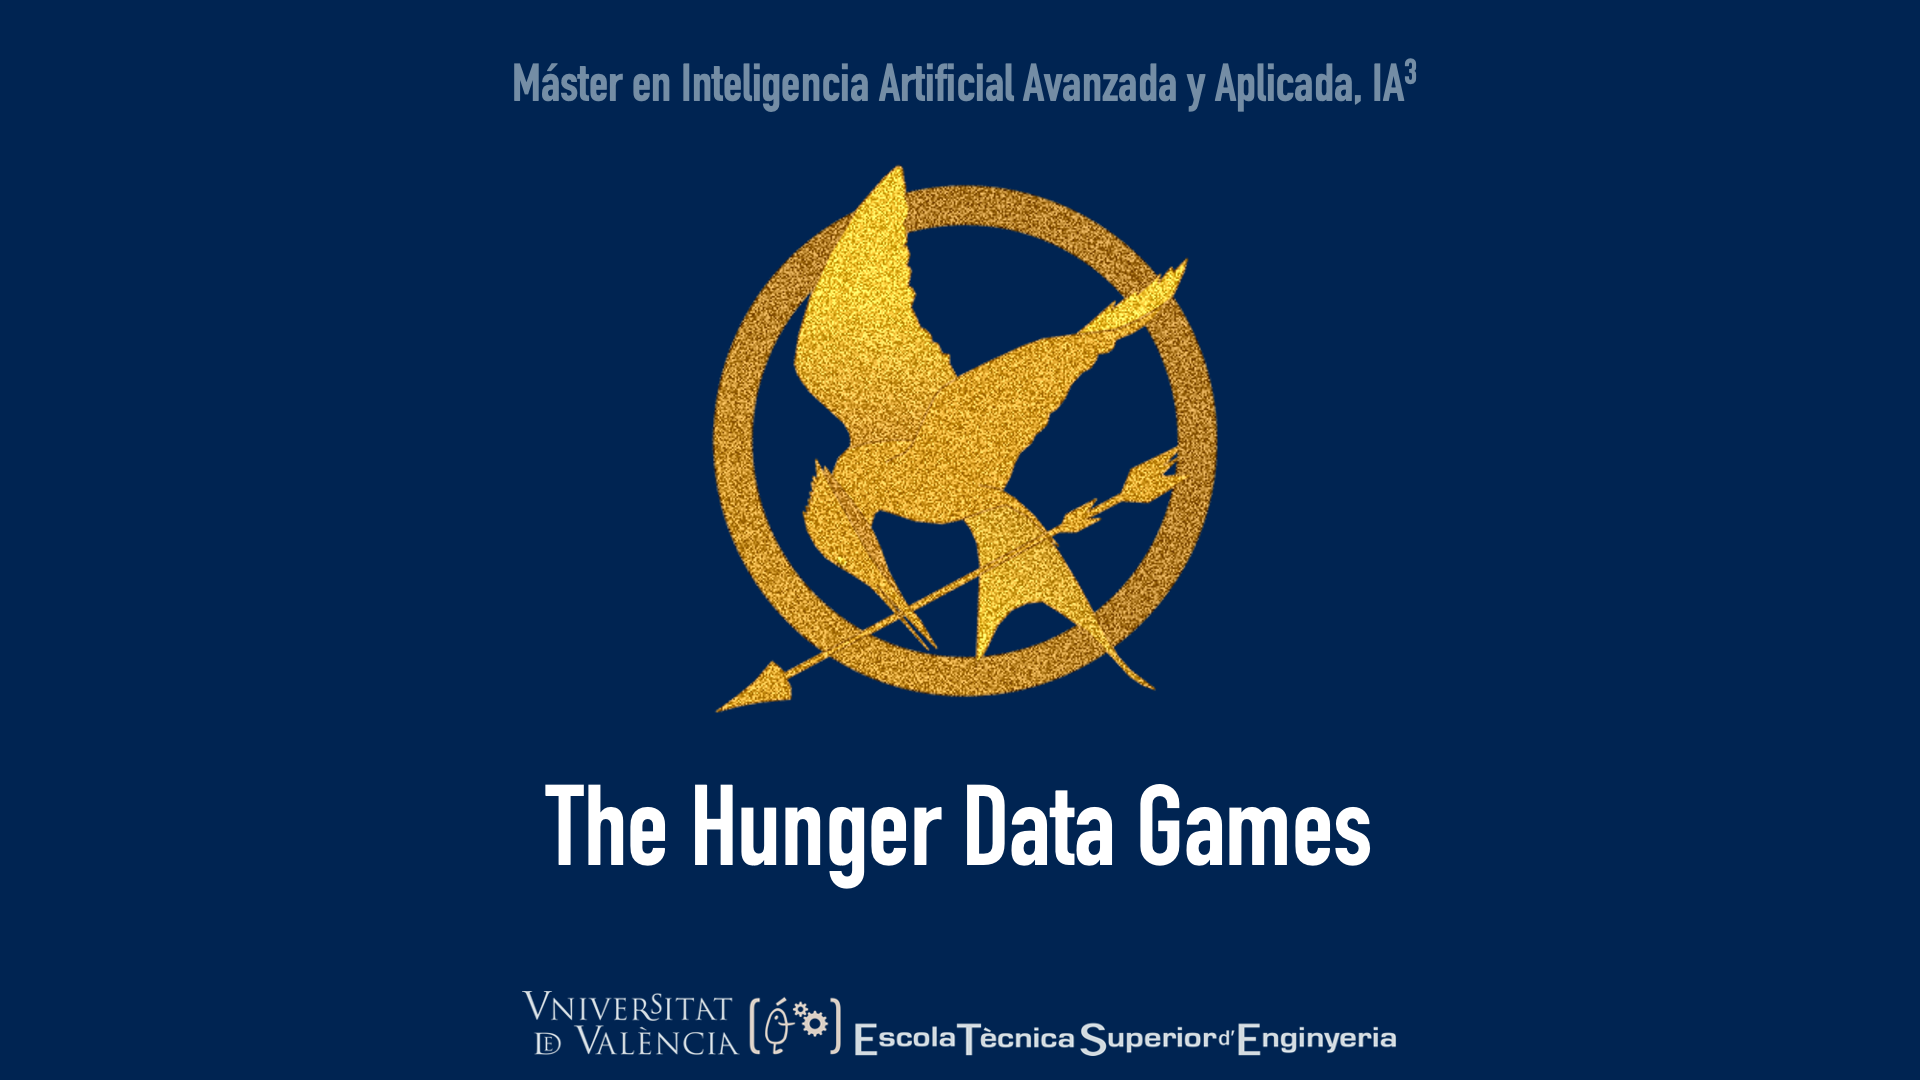

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

> The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

*In* case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

> ## ANÁLISIS DE LOS DATOS.

>Comprobamos valores nulos

In [ ]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:

dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


>Eliminamos muestras repetidas y vemos un resumen de los datos que tenemos

In [ ]:
dataframe = dataframe.drop_duplicates()
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
dataframe.groupby("type_of_glass").mean()
# %_elemento en cada tipo:

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


In [ ]:
dataframe.groupby("type_of_glass").count()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
type_of_glass,,,,,,,,,
1,69,69,69,69,69,69,69,69,69
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


>Vemos que cada característica presenta un rango de valores diferentes, estan en diferentes escalas de rango. Deperemos "escalar" los datos.

>Vamos a observar que disrtubición presentan, para determinar que método aplicar.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


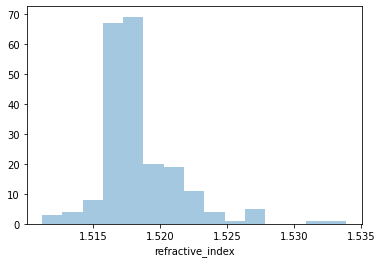

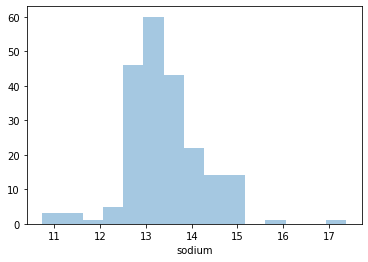

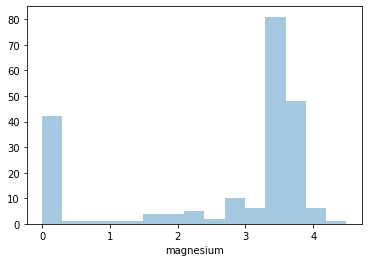

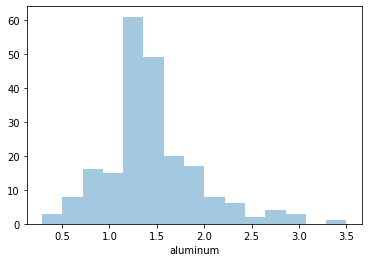

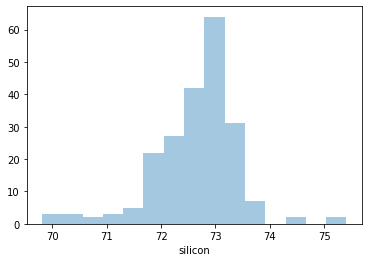

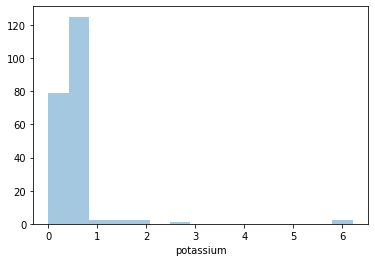

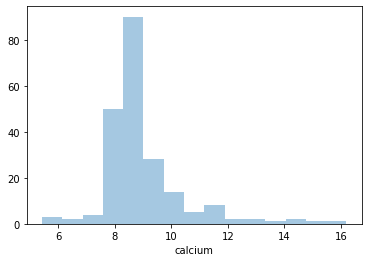

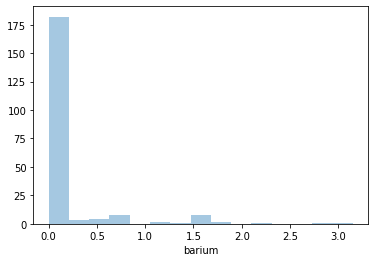

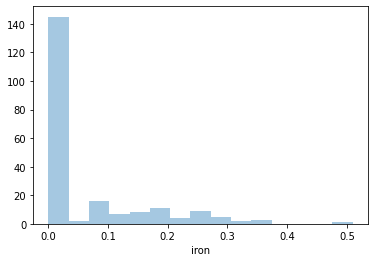

In [ ]:
features = dataframe.iloc[:,:-1]

for i in features:
    skew = features[i].skew()
    sns.distplot(features[i], kde= False, bins=15) #si  no le pongo kde false me da un warning
    
    plt.show()

> Dado que no todas las características parecen llevar una distribución normal, aplicaremos estandarización.

>Vamos a analizar el Target.

In [ ]:
dataframe['type_of_glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

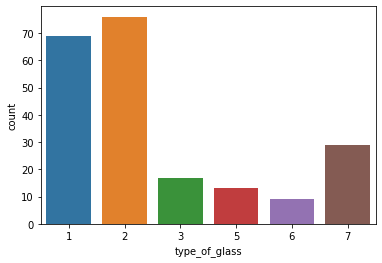

In [ ]:
import seaborn as sns

sns.countplot(x='type_of_glass', data=dataframe)
plt.show()

>Procedemos a ver en que proporcion de cada elemento tengo en cada tipo de cistal.

> **OJOOO**: al hacer el gráfico me da warning. CORREGIR O QUITAR



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


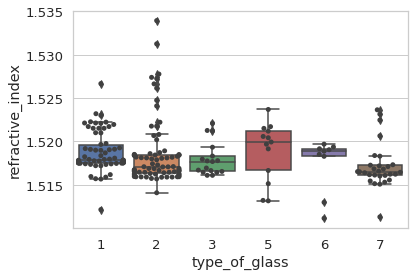

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".25")

In [ ]:
feature_names = dataframe.columns[:-1]
feature_names

Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; y

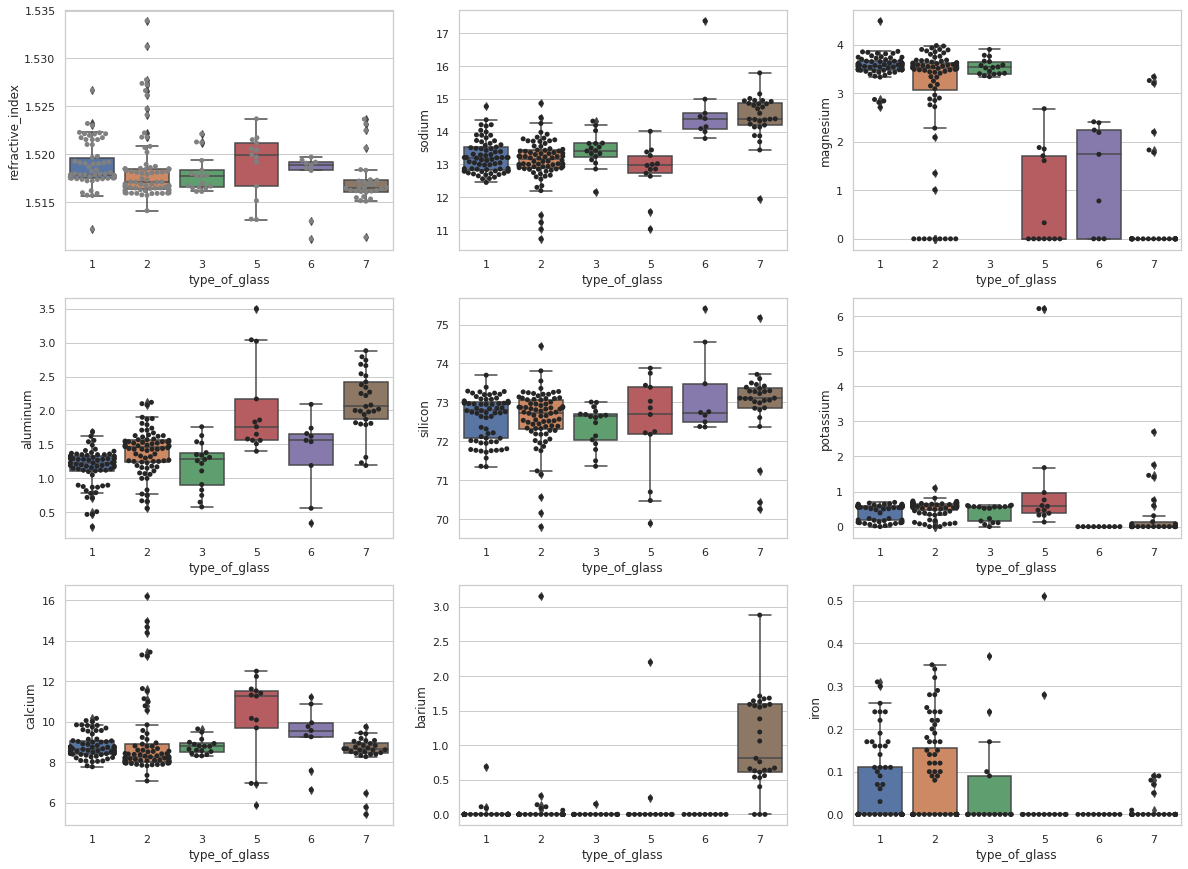

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.subplots(figsize = (20,15))

plt.subplot(3,3,1)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".15")

plt.subplot(3,3,2)
ax = sns.boxplot(x="type_of_glass", y="sodium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="sodium", data=dataframe, color=".15")

plt.subplot(3,3,3)
ax = sns.boxplot(x="type_of_glass", y="magnesium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="magnesium", data=dataframe, color=".15")

plt.subplot(3,3,4)
ax = sns.boxplot(x="type_of_glass", y="aluminum", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="aluminum", data=dataframe, color=".15")

plt.subplot(3,3,5)
ax = sns.boxplot(x="type_of_glass", y="silicon", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="silicon", data=dataframe, color=".15")

plt.subplot(3,3,6)
ax = sns.boxplot(x="type_of_glass", y="potassium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="potassium", data=dataframe, color=".15")

plt.subplot(3,3,7)
ax = sns.boxplot(x="type_of_glass", y="calcium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="calcium", data=dataframe, color=".15")

plt.subplot(3,3,8)
ax = sns.boxplot(x="type_of_glass", y="barium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="barium", data=dataframe, color=".15")

plt.subplot(3,3,9)
ax = sns.boxplot(x="type_of_glass", y="iron", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="iron", data=dataframe, color=".15")

plt.show()

>Pese a que se observa mal, ponemos ver que no todos los tipos de cristales están compuestos en la misma proporción de cada elemento, includo algunos cristales no contienen de algunos elemento.

> ## PREPARAR DATOS (**OJOOO**!! HAY QUE CREAR UNA CLASE CON ESTO)

In [2]:
#dataframe = dataframe.drop_duplicates()

In [3]:
# Standarization
from sklearn.preprocessing import StandardScaler

X = dataframe.iloc[:,:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

X_transformed_df.head(5)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [6]:
Y = dataframe.iloc[:,-1:]
Y.head(5)

,type_of_glass
0,1
1,1
2,1
3,1
4,1


>** CREAR LA CLASE



In [ ]:
""""
from sklearn.preprocessing import StandardScaler

class X_y:
  def __init__(self, dataframe):
    self.dataframe = dataframe

    

  def datos(self, dataframe):
    dataframe = self.dataframe.drop_duplicates()

    X = dataframe.iloc[:,:-1]
    std_scl = StandardScaler()
    X_transformed = std_scl.fit_transform(X)
    X_transformed_df = pd.DataFrame(X_transformed)
    X_transformed_df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

    Y = dataframe.iloc[:,-1:]

    return X_transformed_df, Y

""""

> ## CONSTRUIR MODELO

> Tenemos un problema de clasificación, ya que nuestra target es una variable categórica con 6 tipos o clases. Empezamos con un árbol de decisiones como modelo.

OJO: tenemos cristales tipo 1, 2, 3, 5, 6, 7 (falta el 4, por ello tenemos 6 tipos)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
"""
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed_df, Y, shuffle=True)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
#lo paso a numpy porque más adelante me da un Warning Convert o algo así
"""

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed_df, Y, shuffle=True)
#como los datos están ordenados por tipos de cristales, los desordeno con shuffle

># Modelo Base Line: DecisionTreeClassifier

In [60]:
#definir modelo
model = DecisionTreeClassifier(criterion="entropy")

In [61]:
#entrenar modelo
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
print('Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(model.score(X_train, Y_train)))
print('Sobre el conjunto de test:          {:.2f}'.format(model.score(X_test, Y_test)))

Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72


In [63]:
from  sklearn.metrics import accuracy_score
print('Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(accuracy_score(Y_test, model.predict(X_test))))

Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72


In [64]:
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy Score:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model.predict(X_test))))

Balanced Accuracy Score:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.68


In [65]:
from sklearn.metrics import f1_score
print('F1 Score:')
print('Sobre el conjunto de entrenamiento:', (f1_score(Y_train,model.predict(X_train),average=None)))
print('Sobre el conjunto de test         :', (f1_score(Y_test,model.predict(X_test),average=None)))

F1 Score:
Sobre el conjunto de entrenamiento: [1. 1. 1. 1. 1. 1.]
Sobre el conjunto de test         : [0.75       0.68571429 0.46153846 0.         1.         1.        ]


In [66]:
print('F1 Score Micro:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model.predict(X_test),  average='micro')))

F1 Score Micro:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72


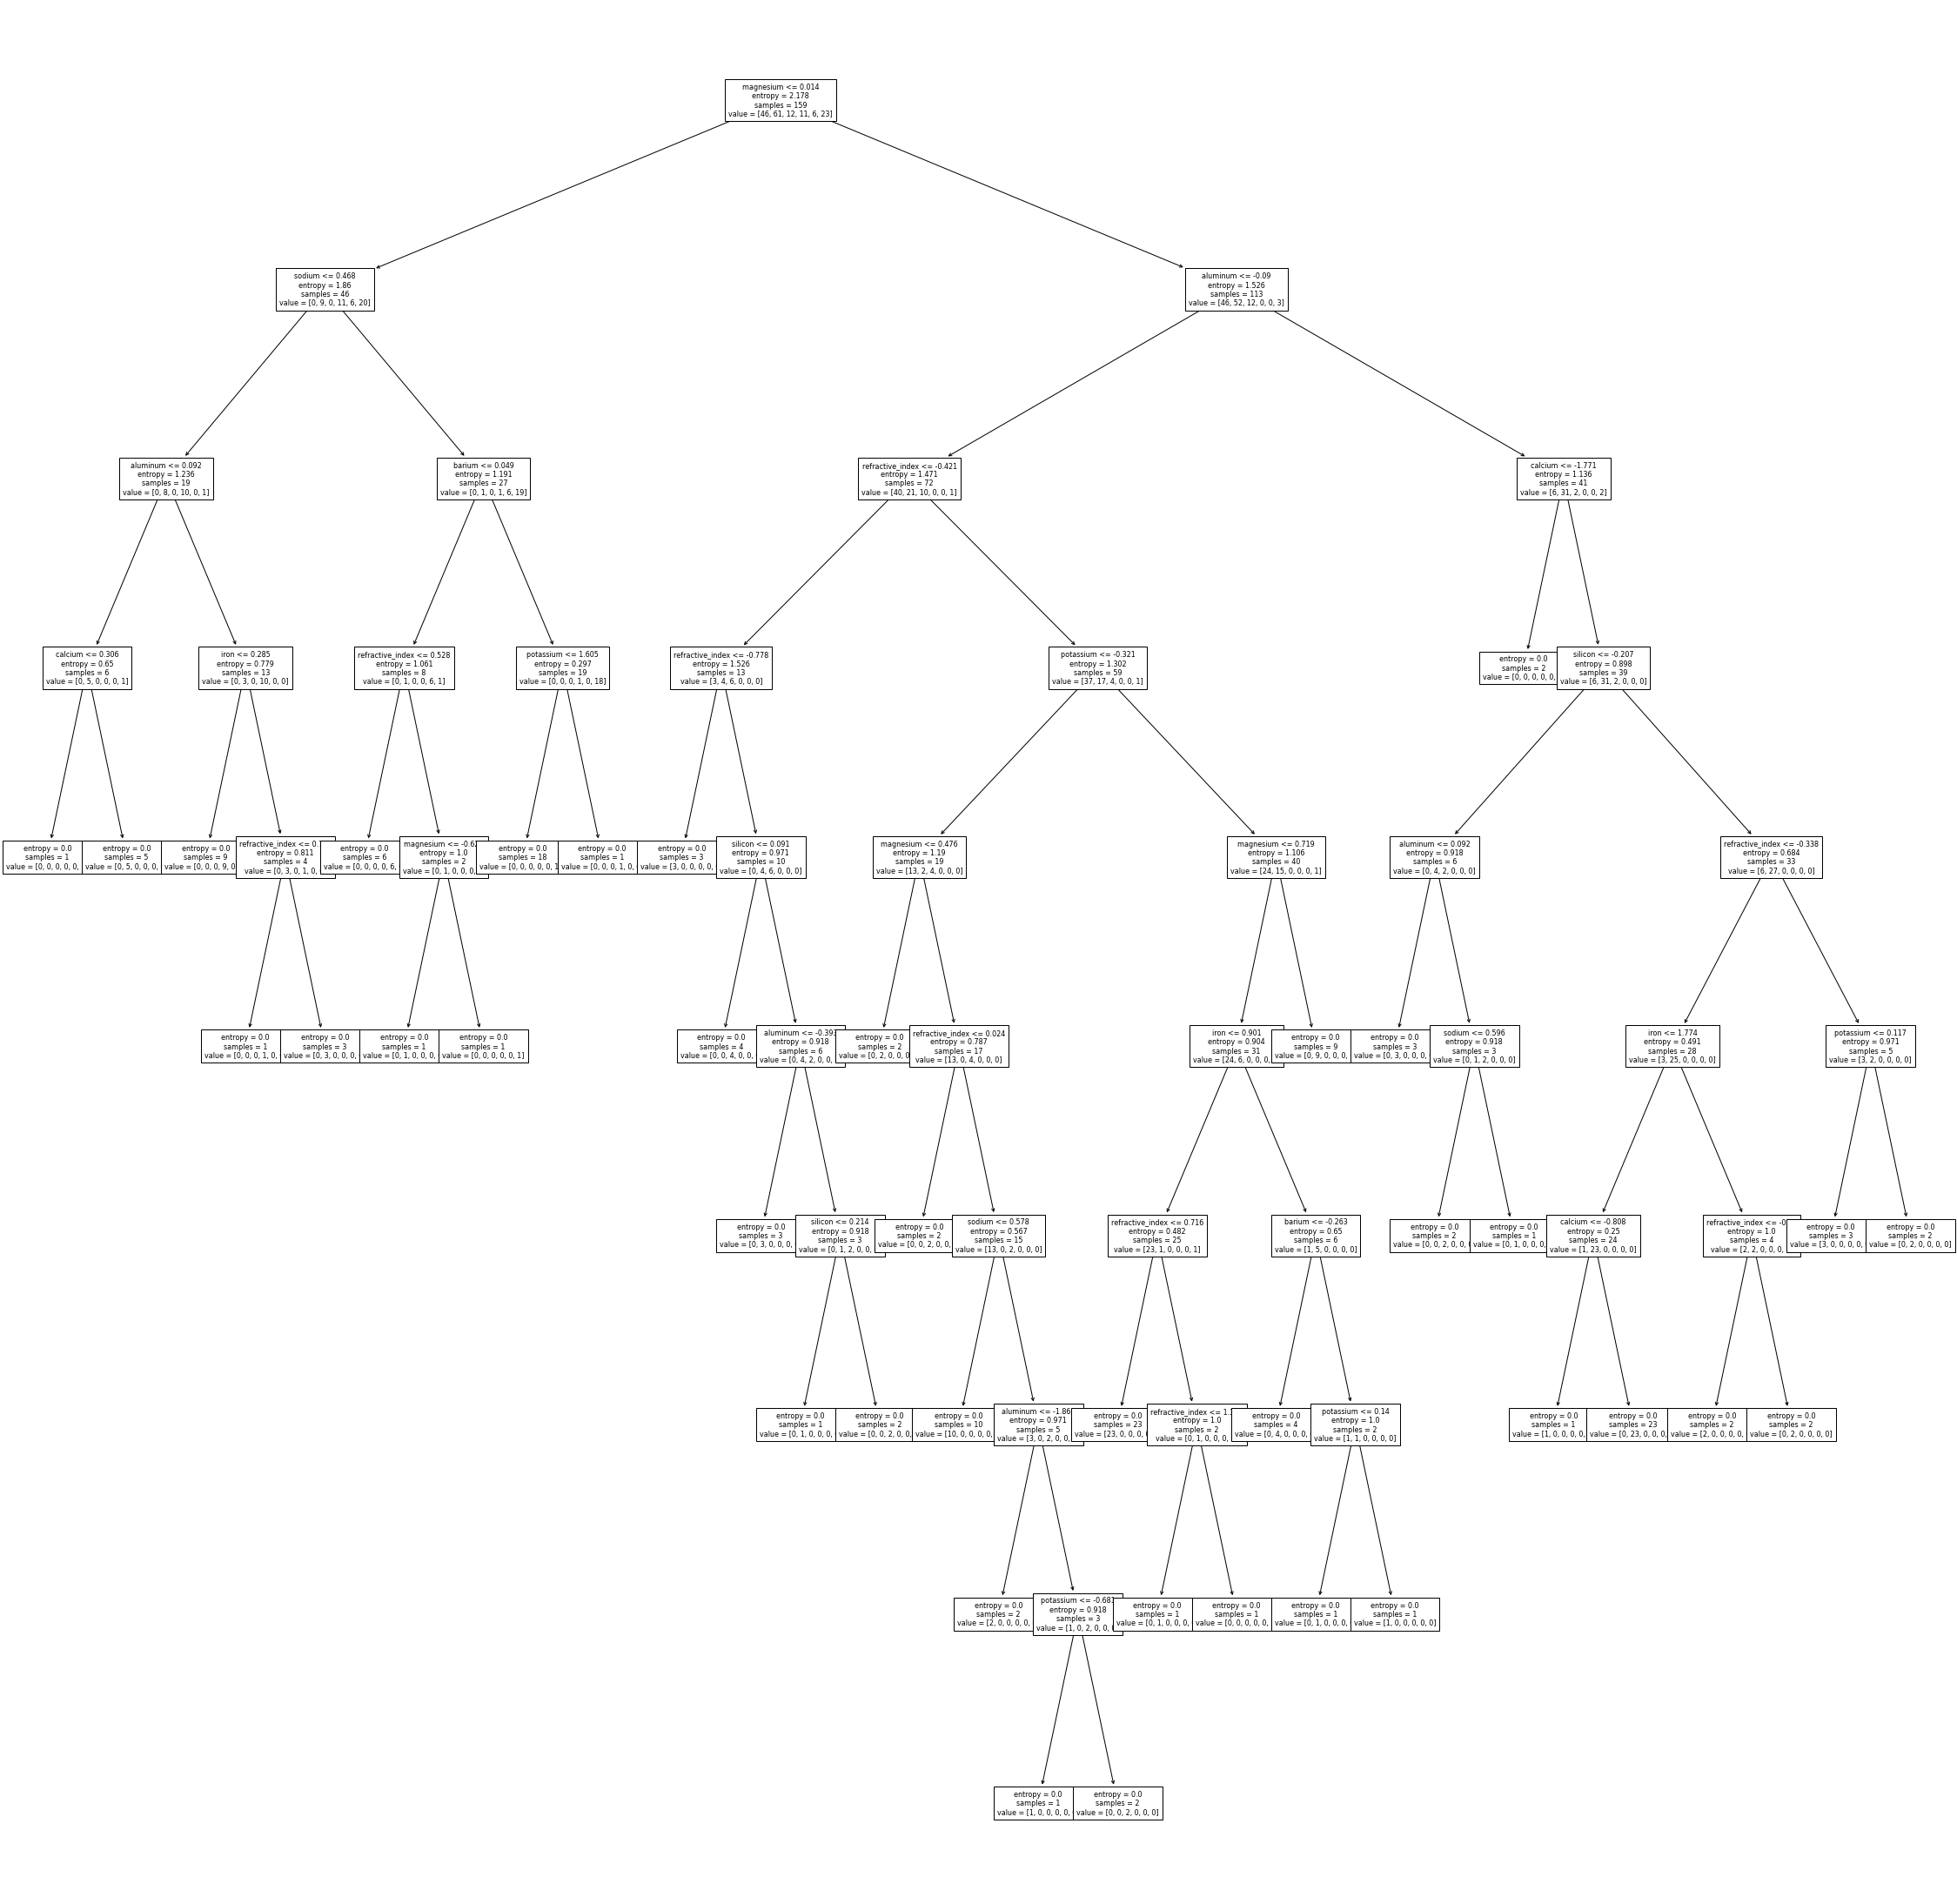

In [67]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model, feature_names=X_transformed_df.columns, fontsize=8)
plt.show()

> # Ajustamos los parámetros del modelo

In [68]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=20, min_samples_split=4)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=4)

In [69]:

print("Metrica del modelo_base entrenado", model.score(X_train, Y_train))
print("Metrica del modelo_2 entrenado", model2.score(X_train, Y_train))

print("Metrica del modelo_base testeando", model.score(X_test, Y_test))
print("Metrica del modelo_2 testeando", model2.score(X_test, Y_test))

Metrica del modelo_base entrenado 1.0
Metrica del modelo_2 entrenado 0.9622641509433962
Metrica del modelo_base testeando 0.7222222222222222
Metrica del modelo_2 testeando 0.8333333333333334


In [70]:
print('Balanced Accuracy Score:')
print('Modelo inicial:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model.predict(X_test))))

print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))


Balanced Accuracy Score:
Modelo inicial:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.68
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.73


Mejoramos la precisión de nuestro modelo al testear. En entrenamiento baja un poco la precisión pero no es importante, ya que el 1 del modelo inicial podría deberse a que el modelo estaba sobreajustado, es decir, ha aprendido "de memoria". Podemos decir, que ahora hemos corregido el sobreajuste y hemos aumentado la precisión del modelo.

In [71]:
print('F1 Score Simple:')
print('Modelo inicial:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model.predict(X_test),  average='micro')))
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))

F1 Score Simple:
Modelo inicial:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.72
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.96
Sobre el conjunto de test:          0.83


In [45]:
#print("accuracy_score modelo_base", accuracy_score(Y_test, model.predict(X_test)))
#print("accuracy_score modelo 2", accuracy_score(Y_test, model2.predict(X_test)))

accuracy_score modelo_base 0.6851851851851852
accuracy_score modelo 2 0.6851851851851852


In [75]:
#print("f1_score modelo_base", f1_score(Y_test,model.predict(X_test),average=None))
#print("f1_score modelo_2", f1_score(Y_test,model2.predict(X_test),average=None))

f1_score modelo_base [0.75       0.68571429 0.46153846 0.         1.         1.        ]
f1_score modelo_2 [0.8372093  0.83333333 0.66666667 0.         1.         1.        ]


Con el Modelo tuneado mejora la precisión de predicción de todas las clases excepto de una.

> # RANDOM FOREST CLASSIFIER

In [76]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()

In [77]:
model_RF.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [79]:
model_RF.score(X_test, Y_test)

0.8703703703703703

In [80]:
print('Balanced Accuracy Score:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))

print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF.predict(X_test))))


Balanced Accuracy Score:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.73
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.86


In [81]:
print('F1 Score Simple:')
print('Modelo Tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))
print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF.predict(X_test),  average='micro')))

F1 Score Simple:
Modelo Tuneado:
Sobre el conjunto de entrenamiento: 0.96
Sobre el conjunto de test:          0.83
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.87


In [83]:
print("f1_score modelo 2", f1_score(Y_test,model2.predict(X_test),average=None))
print("f1_score modelo RandomForest", f1_score(Y_test,model_RF.predict(X_test),average=None))


f1_score modelo 2 [0.8372093  0.83333333 0.66666667 0.         1.         1.        ]
f1_score modelo RandomForest [0.89361702 0.83870968 0.57142857 1.         0.85714286 1.        ]


In [84]:
print("f1_score modelo 2", f1_score(Y_train,model2.predict(X_train),average=None))
print("f1_score modelo RandomForest", f1_score(Y_train,model_RF.predict(X_train),average=None))


f1_score modelo 2 [0.97826087 0.95867769 0.88888889 1.         1.         0.95454545]
f1_score modelo RandomForest [1. 1. 1. 1. 1. 1.]


> Parece que aplicar un RandomForest optimizamos el modelo. Pero podría estar sobreajustando.

> Tuning Random Forest

In [85]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15]}
rf_2 = RandomForestClassifier()
grid = GridSearchCV(rf_2, param_grid, scoring="balanced_accuracy", cv=5)

In [89]:
grid.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [5, 10, 15]},
             scoring='balanced_accuracy')

In [90]:
print("Los mejores hipermarámetros son %s con un score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Los mejores hipermarámetros son {'max_depth': 10, 'min_samples_split': 5} con un score de 0.65


In [92]:
model_RF2 = grid.best_estimator_
model_RF2.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [98]:
print('Balanced Accuracy Score:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model2.predict(X_test))))
print('Modelo RF: (Posible Overfitting)')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF.predict(X_test))))
print('Modelo RF - CrossValidation:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(balanced_accuracy_score(Y_train, model_RF2.predict(X_train))))
print('Sobre el conjunto de test:          {:.2f}'.format(balanced_accuracy_score(Y_test, model_RF2.predict(X_test))))

Balanced Accuracy Score:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.97
Sobre el conjunto de test:          0.73
Modelo RF: (Posible Overfitting)
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.86
Modelo RF - CrossValidation:
Sobre el conjunto de entrenamiento: 0.99
Sobre el conjunto de test:          0.73


In [99]:
print('F1 Score Simple:')
print('Modelo tuneado:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model2.predict(X_test),  average='micro')))
print('Modelo RF:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF.predict(X_test),  average='micro')))
print('Modelo RF - CrossValidation:')
print('Sobre el conjunto de entrenamiento: {:.2f}'.format(f1_score (Y_train, model_RF2.predict(X_train), average='micro')))
print('Sobre el conjunto de test:          {:.2f}'.format(f1_score (Y_test, model_RF2.predict(X_test),  average='micro')))


F1 Score Simple:
Modelo tuneado:
Sobre el conjunto de entrenamiento: 0.96
Sobre el conjunto de test:          0.83
Modelo RF:
Sobre el conjunto de entrenamiento: 1.00
Sobre el conjunto de test:          0.87
Modelo RF - CrossValidation:
Sobre el conjunto de entrenamiento: 0.99
Sobre el conjunto de test:          0.80


Parece que al intentar mejorar el modelo inicial tuneado (DecisionTree) con un RandomForest hemos bajado las métricas, y parece un modelo con overfitting. Además, hemos intentado encontrar los mejores Hyperparameters mediante CrossValidation, pero el modelo inicial tuneado parece funcionar mejor al ponerlo a prueba en el test.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid2 = {'max_depth': np.arange(1,30,1), 'min_samples_split': np.arange(10,100,10)}
rf_2 = RandomForestClassifier()
grid2 = GridSearchCV(rf_2, param_grid2, scoring="balanced_accuracy", cv=5)

In [ ]:
grid2.fit(X_train, Y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='balanced_accuracy')

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid2.best_params_, grid2.best_score_))

The best parameters are {'max_depth': 7, 'min_samples_split': 10} with a score of 0.68


In [ ]:
model4 = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_split=10)
model4.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=10)

In [ ]:
#max_depth=20, min_samples_split=4 - MEJOR
print("Metrica del modelo entrenado", model4.score(X_train, Y_train))
print("Metrica del modelo testeando", model4.score(X_test, Y_test))
print("Metrica del modelo 2 testeando", model2.score(X_test, Y_test))

Metrica del modelo entrenado 0.9119496855345912
Metrica del modelo testeando 0.6481481481481481
Metrica del modelo 2 testeando 0.7037037037037037


In [ ]:
print(accuracy_score(Y_test, model2.predict(X_test)))
print(accuracy_score(Y_test, model4.predict(X_test)))
print(balanced_accuracy_score(Y_test, model2.predict(X_test)))
print(balanced_accuracy_score(Y_test, model4.predict(X_test)))
print(f1_score(Y_test,model2.predict(X_test),average=None))
print(f1_score(Y_test,model4.predict(X_test),average=None))

0.7037037037037037
0.6481481481481481
0.774815054226819
0.7391007685125333
[0.66666667 0.64705882 0.57142857 0.8        0.75       0.81818182]
[0.5        0.59459459 0.57142857 0.72727273 0.85714286 0.81818182]


>El mejor modelo fue el Modelo2, DecisionTree con hiperparámetros:

**model2 = DecisionTreeClassifier(criterion="entropy", max_depth=20, min_samples_split=4)
model2.fit(X_train, Y_train)**